##### Chem 30324, Spring 2020, Homework3

# Due February 5, 2020

## Heat capacity of solids

### 1. In Einstein's [original paper](https://onlinelibrary.wiley.com/doi/abs/10.1002/andp.19063270110) on the heat capacity of solids, he compared his model results to experiments on diamond, using a frequency for the vibrating C atoms $\nu = 2.75 \times 10^{13} \text{s}^{-1}$.  What fundamentally did he assume about the vibrating C atoms to describe the heat capacity of diamond?

Einstein assumed that the energy of a vibrating atom was proportional to the frequency of vibration $E\propto\nu$ and that the vibrating atom could have only discrete amounts of vibrational energy, $E = n h \nu$, where $n = 0, 1, \ldots$.

### 2. Plot the Einstein model for the heat capacity of diamond from 0 to 1500 K.

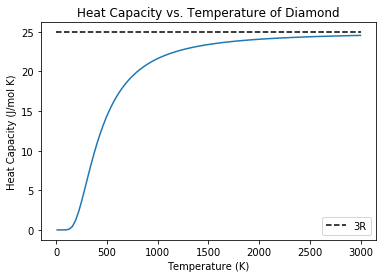

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#Constants
h = 6.626e-34 #m^2 kg/s
kB = 1.3806e-23 #m^2 kg/s^2 K
Nav = 6.022e23 # /mol
v = 2.75e13 #1/s

T = np.linspace(10,3000,100)
Cp = (3*h**2*v**2*np.exp(h*v/kB/T))/(kB*T**2*(np.exp(h*v/kB/T)-1)**2) #The derivative of the expected energy function wrt temperature
Cp = Cp*Nav

plt.plot(T,Cp)
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/mol K)')
plt.title('Heat Capacity vs. Temperature of Diamond')
plt.plot([0,3000],[3*kB*Nav,3*kB*Nav],color='black',linestyle='dashed',label='3R')
plt.legend()
plt.show()

### 3. What is the probability for a C atom to have $n=1$ quanta of energy relative to $n=0$ at 1500 K?  At 150 K?

$P(n=1)/P(n=0) = \exp(-(E_1 -E_0)/k_BT) = \exp(-(1 h\nu - 0 h\nu)/k_BT) = \exp(-h\nu/k_BT)$

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#Constants
h = 6.626e-34 #m^2 kg/s
kB = 1.3806e-23 #m^2 kg/s^2 K
v = 2.75e13 #1/s


P1500 = np.exp(-h * v/kB/1500.)
P150 = np.exp(-h * v/kB/150.)

print('Ratio at 1500 and 150 K are {} and {}, respectively'.format(P1500,P150))
T = 1500 #K

Ratio at 1500 and 150 K are 0.414831384968452 and 0.00015090932081352938, respectively


Very probably at high $T$, not at all probable at low $T$.

## Blackbody radiators.
By treating the sun as a blackbody radiator, Joseph Stefan derived the first reliable estimate of the temperature of the sun’s surface.

### 4. Stefan estimated that the power per unit area radiated from the surface of the sun was 43.5 times greater than that of a metal bar heated to 1950 ̊C. What is the temperature of the sun?

Stefan-Boltzmann law relates power and temperature, $I =\sigma T^4$.  $I_{sun}/I_{bar}=43.5 = (T_{sun}/T_{bar})^4$

In [0]:
Tmetal = 1950+273.15 #K
Tsun = (43.5*Tmetal**4)**.25
print('The temperature of the sun is {} Kelvin.'.format(Tsun))

The temperature of the sun is 5709.408017572795 Kelvin.


### 5. Based on this temperature, what wavelength $\lambda$ of light does the sun emit most intensely, in nm? What frequency of light, in s$^{–1}$? What color does this correspond to?

In [0]:
wavelength = 2897768/Tsun #nm
c = 299792458 #m/s
freq= c/wavelength *1e9
print('The sun emits a wavelength of {} nm most intensely.'.format(wavelength))
print('The freqency is %E 1/s.'%(freq))
print('This wavelength corresponds to the color cyan/green.')

The sun emits a wavelength of 507.54263683398653 nm most intensely.
The freqency is 5.906744E+14 1/s.
This wavelength corresponds to the color cyan/green.


### 6. What is the ultraviolet catastrophe, and what did Planck have to assume to circumvent it?

In classical physics, Rayleigh-Jeans law predicted that radiation intensity approached infinity at small wavelengths. This phenomena is known as the ultraviolet catastrophe. 

Planck assumed that a:
- the black body radiator is full of standing waves of light
- the energy of a wave of light is proportional to its frequency
- only discrete amounts of energy were possible at a given frequency, $E = n h \nu$

## Photoelectric effect.
The photoelectric effect refers to the emission of electrons that is observed when light is shone on a metal. The effect was the clue that Einstein needed to illucidate the particulate nature of the interaction of light and matter.

### 7. You set up an experiment in which you shine light of varying intensity and constant frequency at a metal surface and measure the maximum kinetic energy of the emitted electrons. As an accomplished student of classical physics, you know that the energy contained in a wave is proportional to the square of its intensity. Based on this knowledge, sketch how you $expect$ the kinetic energy of the electrons to vary in the experiment. Briefly justify your answer.

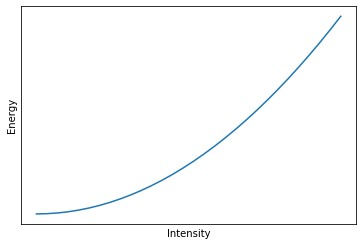

In [0]:
import numpy as np
import matplotlib.pyplot as plt

I = np.linspace(0,2*np.pi,30)
E = I**2

plt.plot(I,E)
plt.xlabel('Intensity')
plt.ylabel('Energy')
plt.xticks([])
plt.yticks([])
plt.show()

### 8. Not finding a result that you like, you set up another experiment in which you vary the frequency of light at constant intensity. Below is the data you collect. Use graphical analysis to determine the workfunction of the metal, in eV, and to estimate Planck’s constant.

|Light Wavelength (nm)|Electron Kinetic Energy (eV)|
|:-:|:-:|
|263|0.13|
|250|0.33|
|234|0.68|
|218|1.08|
|184|2.13|

In [0]:
from scipy.stats import linregress
c = 299792458e9 #nm/s
x = [c/263,c/250,c/234,c/218,c/184] #1/s
y = [.13,.33,.68,1.08,2.13] #eV
slope, intercept, r_value, p_value, std_err = linregress(x,y)

i = np.abs(intercept)

print('The workfunction is {} eV'.format(i))
print('Estimation of Planck\'s constant: {} eV*s'.format(slope))


The workfunction is 4.597804368955146 eV
Estimation of Planck's constant: 4.1268123345226185e-15 eV*s


### 9. What is the metal? $Hint:$ It is a coinage metal.

Copper has a work function of 4.7 eV.

## Diffraction.
Diffraction is the scattering of particles off of a crystal, and is today an essential means of probing the structure of matter. Modern diffraction is performed using bright light and particle sources of various types.

### 10. The spacing between atoms in a Ag crystal is approximately 2.9 Å, a distance that can be measured by scattering photons of a comparable wavelength off the crystal. What is the energy (in eV) of a photon of wavelength 2.9 Å? What part of the electromagnetic spectrum does this correspond to?

In [0]:
h = 4.135668e-15 #eV*s
c = 299792458e9 #nm/s
wavelength = .29 #nm

E = h*c/wavelength #eV
print ('The energy of a photon at 2.9 A is {} eV'.format(E))
print('This corresponds to soft X-rays in the electromagnetic spectrum.')


The energy of a photon at 2.9 A is 4275.317500661877 eV
This corresponds to soft X-rays in the electromagnetic spectrum.


This is the basis of x-ray diffraction, used to figure out the crystal structure of things, like proteins.

### 11. Suppose you have a device that produces these photons at a power of 1 μW. How many photons/s does this correspond to?

In [0]:
P = 1e-6 #J/s
photons = P/E*6.242e18 #photons/s
print('1 microwatt corrsponds to %E photons/second.'%(photons))

1 microwatt corrsponds to 1.460009E+09 photons/second.


### 12. The Ag spacing can also be measured by scattering *electrons* off a crystal. To what speed (in m/s) would an electron need to be accelerated to have the necessary de Broglie wavelength? What fraction of the speed of light is this?

In [0]:
c = 299792458 #m/s
m = 9.109e-31 #kg
h = 6.626e-34 #m^2 kg/s
wavelength = .29e-9 #m

v = h/wavelength/m #m/s
fraction = v/c

print('To have the necessary de Broglie wavelength, v= {} m/s'.format(v))
print('This is {} of the speed of light.'.format(fraction))




To have the necessary de Broglie wavelength, v= 2508318.7904346217 m/s
This is 0.008366850877998478 of the speed of light.


This is the basis of electron diffraction, often used to observe surfaces, eg with an electron microscope.

## The Bohr atom. 
Bohr developed the first successful model of the energy spectrum of a hydrogen atom by postulating that electrons can only exist in certain fixed energy “orbits” indexed by the quantum number $n$. (Recall that the equations describing the Bohr atom are in Table 4 of the course outline.)

### 13. Would light need to be absorbed or emitted to cause an electron to jump from the $n$ = 1 to the $n$ = 2 orbit? What wavelength of light does this correspond to?

In [18]:
Z = 1
n1 = 1
n2 = 2
E1 = -13.6*Z**2/(n1**2) #eV
E2 = -13.6*Z**2/(n2**2) #eV

c = 299792458 #m/s
h = 6.626e-34 #m^2 kg/s

wavelength = h*c/(E2-E1)*1e9/1.60218e-19

print('Light needs to be absorbed to provide energy for electrons to jump to higher orbitals.')
print('This corresponds to a wavelength of',wavelength,'nm.')

Light needs to be absorbed to provide energy for electrons to jump to higher orbitals.
This corresponds to a wavelength of 121.55159347276592 nm.


### 14. What is the circumference of the $n$ = 2 orbit? What is the de Broglie wavelength of an electron in the $n$ = 2 orbit? How do these compare?

In [19]:
import numpy as np
a0 = 5.29e-11 #m, Bohr radius
r = a0*n2**2 #m
l = np.pi*2*r #m
print('The circumference of the n=2 orbit is {} m'.format(l))

The circumference of the n=2 orbit is 1.3295220109992005e-09 m


In [24]:
m = 9.109e-31 #kg
h = 6.626e-34 #m^2 kg/s
hbar = h/(2*np.pi) #m^2 kg/s, reduced Planck constant
k0 = 2.30708e-28
p0 = k0*m/hbar*1/1 #kg m/s
p2 = p0/2
wavelength3 = h/p2
print('The de Broglie wavelength for an electron in n=2 orbit is {} m.'.format(wavelength3))

The de Broglie wavelength for an electron in n=2 orbit is 6.649969202654155e-10 m.


In [23]:
print(l/wavelength3)

1.9992904786214014


Circumference is twice the wavelength. Would be exact if we carried through the constants to higher precision.